<a href="https://colab.research.google.com/github/ahmedsaad565656/Rservoir-Engineering/blob/main/6_ML_Models_ROP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_file.csv to cleaned_file.csv


In [ ]:
df=pd.read_csv("cleaned_file.csv")

In [ ]:
df.head()

,Depth (ft),Weight on bit (k-lbs),Temperature Out (deg F),Temperature In(deg F),Pit Total (bbls),Pump Pressure (psi),Hook load (k-lbs),Surface Torque (psi),Rotary Speed (rpm),Flow In (gal/min),Flow Out Percentage (%),Average Matrix Density (g/cc),Neutron Density Log (g/cc),Gamma (API),Rsistivity (Ohm m),Sonic (us/ft),Calibrated_SHMAX_using_calibrated_Biot,Calibrated_SHMIN_using_calibrated_Biot,SVERTICAL,ROP (ft/hr)
0,2200.28,22.66,119.72,117.29,239.07,1072.77,55.74,186.94,87.94,697.16,79.96,2.71,2.42,100,110,55,1986.910,1656.910,2462.790,60.10
1,2201.28,20.37,119.83,117.41,239.14,1070.44,58.03,178.70,101.24,710.66,75.97,2.71,2.42,100,110,55,1964.521,1634.371,2463.842,47.41
2,2202.28,23.16,119.95,117.48,239.14,1071.28,55.24,184.19,94.31,704.32,77.46,2.71,2.42,100,110,55,1912.118,1581.818,2464.879,44.51
3,2203.29,19.42,121.05,118.09,237.75,1079.28,58.98,161.17,77.11,686.52,80.71,2.71,2.42,100,110,55,1897.813,1567.363,2465.945,43.93
4,2204.31,17.22,121.17,118.17,237.74,1072.25,61.18,173.94,91.38,688.36,74.69,2.71,2.42,100,110,55,1997.134,1666.534,2467.026,29.58


In [ ]:
# Check for missing values
print(df.isnull().sum())


Depth (ft)                                0
Weight on bit (k-lbs)                     0
Temperature Out (deg F)                   0
Temperature In(deg F)                     0
Pit Total (bbls)                          0
Pump Pressure (psi)                       0
Hook load (k-lbs)                         0
Surface Torque (psi)                      0
Rotary Speed (rpm)                        0
Flow In (gal/min)                         0
Flow Out Percentage (%)                   0
Average Matrix Density (g/cc)             0
Neutron Density Log (g/cc)                0
Gamma (API)                               0
Rsistivity (Ohm m)                        0
Sonic (us/ft)                             0
Calibrated_SHMAX_using_calibrated_Biot    0
Calibrated_SHMIN_using_calibrated_Biot    0
SVERTICAL                                 0
ROP (ft/hr)                               0
dtype: int64


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
X = df.drop('ROP (ft/hr)', axis=1)  # Replace 'target_column' with your target column name
y = df['ROP (ft/hr)']

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Separate features and target
X = df.drop('ROP (ft/hr)', axis=1)
y = df['ROP (ft/hr)']

# Select top 2 features using f_regression
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# Create a new DataFrame with selected features
df_selected = pd.DataFrame(X_new, columns=selected_features)
print(df_selected.head())

Selected Features: Index(['Depth (ft)', 'Temperature Out (deg F)', 'Temperature In(deg F)',
       'Hook load (k-lbs)', 'Flow Out Percentage (%)',
       'Neutron Density Log (g/cc)', 'Sonic (us/ft)',
       'Calibrated_SHMAX_using_calibrated_Biot',
       'Calibrated_SHMIN_using_calibrated_Biot', 'SVERTICAL'],
      dtype='object')
   Depth (ft)  Temperature Out (deg F)  Temperature In(deg F)  \
0     2203.29                   121.05                 118.09   
1     2211.32                   121.97                 118.70   
2     2212.32                   122.08                 118.78   
3     2213.32                   122.35                 118.86   
4     2214.32                   122.35                 118.93   

   Hook load (k-lbs)  Flow Out Percentage (%)  Neutron Density Log (g/cc)  \
0              58.98                    80.71                        2.42   
1              59.11                    79.96                        2.42   
2              53.96                    78.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression() # Changed to LinearRegression

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model using appropriate regression metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 48.70
R-squared: 0.78


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Random Forest Regression MSE: {mse:.2f}')
print(f'Random Forest Regression R²: {r2:.2f}')

Random Forest Regression MSE: 31.38
Random Forest Regression R²: 0.86


In [ ]:
from xgboost import XGBRegressor

# Initialize the model
model = XGBRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'XGBoost Regression MSE: {mse:.2f}')
print(f'XGBoost Regression R²: {r2:.2f}')

XGBoost Regression MSE: 33.47
XGBoost Regression R²: 0.85


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Standardize the data (SVR is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model
model = SVR(kernel='rbf')  # You can change the kernel (e.g., 'linear', 'poly')

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'SVR MSE: {mse:.2f}')
print(f'SVR R²: {r2:.2f}')

SVR MSE: 41.66
SVR R²: 0.81


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1))  # Output layer (for regression)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Neural Network MSE: {loss:.2f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 720.2537 - val_loss: 487.8400
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 446.0886 - val_loss: 87.8453
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.9846 - val_loss: 68.7249
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 61.2373 - val_loss: 65.2509
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 61.9385 - val_loss: 63.3793
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56.5604 - val_loss: 61.5152
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 58.6430 - val_loss: 59.8710
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.2027 - val_loss: 58.7039
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 54.2741 - val_loss: 58.6061
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56.4723 - val_loss: 58.3490
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 54.2833 - val_loss: 57.1246
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/st

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Initialize the KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k)

# Train the model
knn_regressor.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [ ]:
# Make predictions on the test set
y_pred = knn_regressor.predict(X_test_scaled)

In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'KNN Regression MSE: {mse:.2f}')
print(f'KNN Regression R²: {r2:.2f}')

KNN Regression MSE: 42.48
KNN Regression R²: 0.81


In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Train SVM model
model = SVC(kernel='rbf', C=1.0, gamma='scale')


In [ ]:
from sklearn.svm import SVR # Changed from SVC to SVR

# Train SVM model for regression
model = SVR(kernel='rbf', C=1.0, gamma='scale')

# Fit the model to the training data
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model using appropriate regression metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'SVR MSE: {mse:.2f}')
print(f'SVR R²: {r2:.2f}')

SVR MSE: 41.66
SVR R²: 0.81


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor # Changed from ExtraTreesClassifier to ExtraTreesRegressor
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train Extra Trees model
model = ExtraTreesRegressor(n_estimators=100, random_state=42) # Changed from ExtraTreesClassifier to ExtraTreesRegressor
model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=42)

In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Instead of accuracy_score, use regression metrics like:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Extra Trees Regression MSE: {mse:.2f}')
print(f'Extra Trees Regression R²: {r2:.2f}')

Extra Trees Regression MSE: 31.22
Extra Trees Regression R²: 0.86


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
# Train GBR model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# Predictions
y_pred = model.predict(X_test)


In [ ]:
# MSE evaluation
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 34.35427807573367


In [ ]:
# R² score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.8461903935646953


In [ ]:
import xgboost as xgb
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


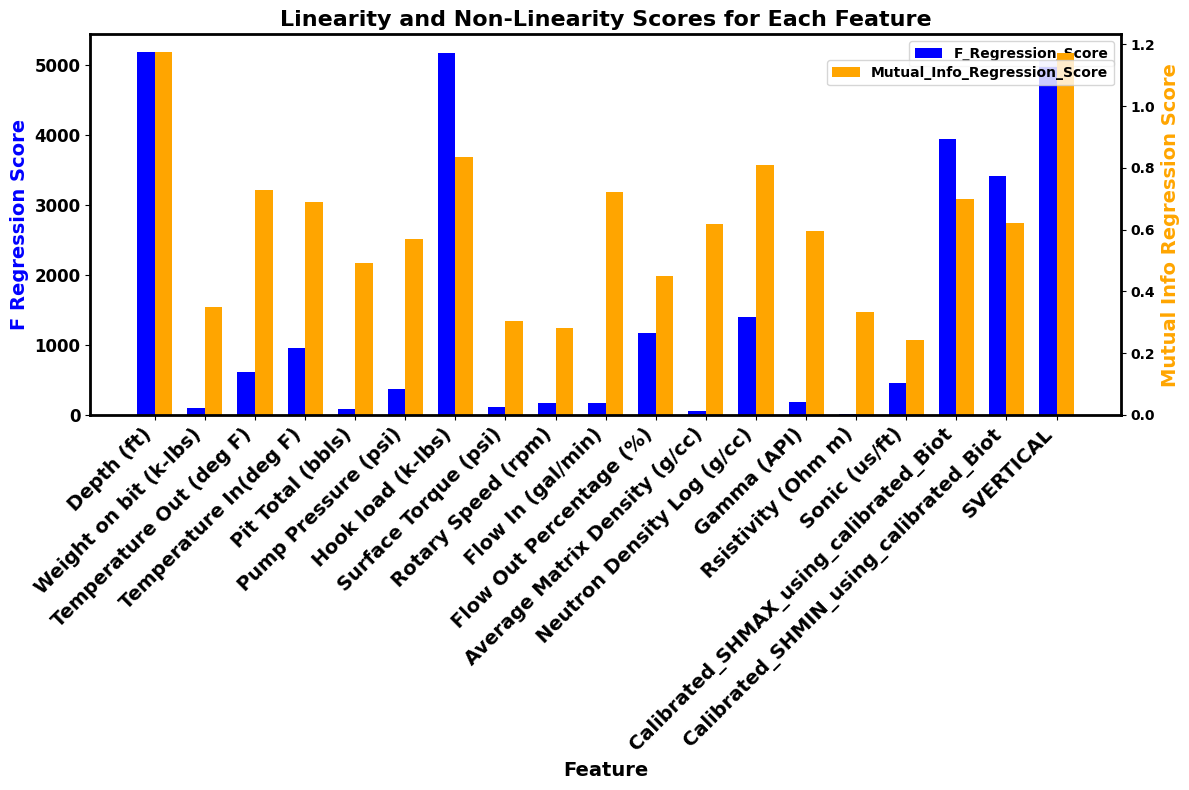

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

# Assume X and y are your input features and target variable
X = df.iloc[:, :-1]  # data_no_outliers
y = df.iloc[:, -1:]  # data_no_outliers

# Evaluate linearity using f_regression
f_regression_scores, _ = f_regression(X, y)

# Evaluate non-linearity using mutual_info_regression
mutual_info_regression_scores = mutual_info_regression(X, y)

# Create a DataFrame to store the scores
scores_df = pd.DataFrame({
    'Feature': X.columns,
    'F_Regression_Score': f_regression_scores,
    'Mutual_Info_Regression_Score': mutual_info_regression_scores
})

# Plot two bars for each feature with different colors
fig, ax1 = plt.subplots(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(scores_df))

color1 = 'blue'
color2 = 'orange'

# Plot bars for F_Regression_Score on the first y-axis (ax1)
rects1 = ax1.bar(index, scores_df['F_Regression_Score'], bar_width, label='F_Regression_Score', color=color1)

# Create a second y-axis (ax2) sharing the same x-axis
ax2 = ax1.twinx()

# Plot bars for Mutual_Info_Regression_Score on the second y-axis (ax2)
rects2 = ax2.bar(index + bar_width, scores_df['Mutual_Info_Regression_Score'], bar_width, label='Mutual_Info_Regression_Score', color=color2)

# Labeling and formatting
ax1.set_xlabel('Feature', weight='bold', fontsize=14)
ax1.set_ylabel('F Regression Score', color=color1, weight='bold', fontsize=14)
ax2.set_ylabel('Mutual Info Regression Score', color=color2, weight='bold', fontsize=14)
ax1.set_title('Linearity and Non-Linearity Scores for Each Feature', weight='bold', fontsize=16)
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(scores_df['Feature'], rotation=45, ha='right', weight='bold', fontsize=14)

# Make y-axis tick labels bold
for label in ax1.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(12)

for label in ax2.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(12)

# Position the legends below each other
legend1 = ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))
legend2 = ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.95))
# Make legend font bold
legend1.get_texts()[0].set_weight('bold')
legend2.get_texts()[0].set_weight('bold')

# Remove grid
ax1.grid(False)
ax2.grid(False)

plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
plt.gca().spines['top'].set_linewidth(2)  # Set linewidth for the top frame
plt.gca().spines['right'].set_linewidth(2)  # Set linewidth for the right frame
plt.gca().spines['bottom'].set_linewidth(2)  # Set linewidth for the bottom frame
plt.gca().spines['left'].set_linewidth(2)  # Set linewidth for the left frame

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files

# Save the plot
plt.savefig('Comparison of Feature Evaluation Scores for Each Feature.png')

# Download the file
files.download('Comparison of Feature Evaluation Scores for Each Feature.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


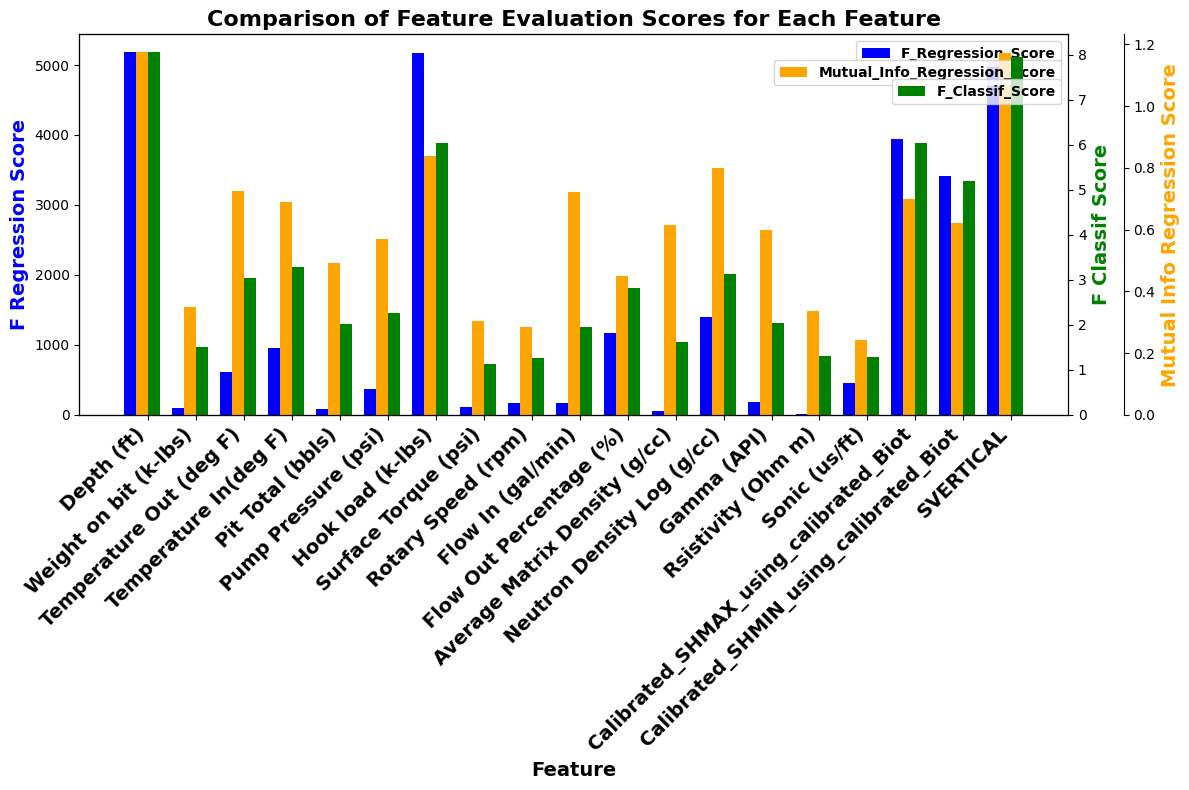

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression, f_classif

# Assume X and y are your input features and target variable

# Evaluate linearity using f_regression
f_regression_scores, _ = f_regression(X, y)

# Evaluate non-linearity using mutual_info_regression
mutual_info_regression_scores = mutual_info_regression(X, y)

# Evaluate significance in a classification context using f_classif
f_classif_scores, _ = f_classif(X, y)

# Create a DataFrame to store the scores
scores_df = pd.DataFrame({
    'Feature': X.columns,
    'F_Regression_Score': f_regression_scores,
    'Mutual_Info_Regression_Score': mutual_info_regression_scores,
    'F_Classif_Score': f_classif_scores
})

# Plot three bars for each feature with different colors
fig, ax1 = plt.subplots(figsize=(12, 8))
bar_width = 0.25
index = np.arange(len(scores_df))

color1 = 'blue'
color2 = 'orange'
color3 = 'green'

# Plot bars for F_Regression_Score on the first y-axis (ax1)
rects1 = ax1.bar(index, scores_df['F_Regression_Score'], bar_width, label='F_Regression_Score', color=color1)

# Create a second y-axis (ax2) sharing the same x-axis
ax2 = ax1.twinx()

# Plot bars for Mutual_Info_Regression_Score on the second y-axis (ax2)
rects2 = ax2.bar(index + bar_width, scores_df['Mutual_Info_Regression_Score'], bar_width, label='Mutual_Info_Regression_Score', color=color2)

# Create a third y-axis (ax3) sharing the same x-axis
ax3 = ax1.twinx()
ax2.spines['right'].set_position(('outward', 40))  # Adjust the position to the right

# Plot bars for F_Classif_Score on the third y-axis (ax3)
rects3 = ax3.bar(index + 2 * bar_width, scores_df['F_Classif_Score'], bar_width, label='F_Classif_Score', color=color3)

# Labeling and formatting
ax1.set_xlabel('Feature',weight='bold', fontsize=14)
ax1.set_ylabel('F Regression Score', color=color1,weight='bold', fontsize=14)
ax2.set_ylabel('Mutual Info Regression Score', color=color2,weight='bold', fontsize=14)
ax3.set_ylabel('F Classif Score', color=color3, weight='bold', fontsize=14)
ax1.set_title('Comparison of Feature Evaluation Scores for Each Feature',weight='bold',fontsize=16)
ax1.set_xticks(index + 1.5 * bar_width)
ax1.set_xticklabels(scores_df['Feature'], rotation=45, ha='right',weight='bold', fontsize=14)

# Position the legends below each other
legend1=ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))
legend2=ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.95))
legend3=ax3.legend(loc='upper right', bbox_to_anchor=(1, 0.9))
# Make legend font bold
legend1.get_texts()[0].set_weight('bold')
legend2.get_texts()[0].set_weight('bold')
legend3.get_texts()[0].set_weight('bold')

# Remove grid
ax1.grid(False)
ax2.grid(False)
ax3.grid(False)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:

from google.colab import files

# Download the file
files.download('Comparison of Feature Evaluation Scores for Each Feature.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Rank features by Mutual_Info_Regression_Score (for regression)
ranked_features = scores_df.sort_values(by='Mutual_Info_Regression_Score', ascending=False)
print(ranked_features)

                                   Feature  F_Regression_Score  \
0                               Depth (ft)         5179.427344   
18                               SVERTICAL         5058.342559   
6                        Hook load (k-lbs)         5169.857260   
12              Neutron Density Log (g/cc)         1394.598186   
2                  Temperature Out (deg F)          615.064563   
9                        Flow In (gal/min)          173.982615   
16  Calibrated_SHMAX_using_calibrated_Biot         3940.578586   
3                    Temperature In(deg F)          957.774006   
17  Calibrated_SHMIN_using_calibrated_Biot         3409.891158   
11           Average Matrix Density (g/cc)           53.480911   
13                             Gamma (API)          177.687289   
5                      Pump Pressure (psi)          368.418180   
4                         Pit Total (bbls)           80.504399   
10                 Flow Out Percentage (%)         1167.669704   
1         

In [ ]:
# Select top 10 features
top_features = ranked_features['Feature'].head(10).tolist()
print("Top Features:", top_features)

Top Features: ['Depth (ft)', 'SVERTICAL', 'Hook load (k-lbs)', 'Neutron Density Log (g/cc)', 'Temperature Out (deg F)', 'Flow In (gal/min)', 'Calibrated_SHMAX_using_calibrated_Biot', 'Temperature In(deg F)', 'Calibrated_SHMIN_using_calibrated_Biot', 'Average Matrix Density (g/cc)']


# **Run with Selected features for ET ** **bold text**

In [ ]:
# Import necessary libraries
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd

# Step 1: Select the top features
X_selected = X[top_features]

In [ ]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
# Step 3: Initialize the ET Algorithm
# For regression tasks, use ExtraTreesRegressor instead of ExtraTreesClassifier
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

In [ ]:
# Step 4: Train the ET model
et_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesRegressor(random_state=42)

In [ ]:
# Step 5: Make predictions on the test set
y_pred = et_model.predict(X_test)

In [ ]:
# Instead of accuracy_score, use regression metrics like:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Extra Trees Regression MSE: {mse:.2f}')
print(f'Extra Trees Regression R²: {r2:.2f}')

Extra Trees Regression MSE: 30.16
Extra Trees Regression R²: 0.86


In [ ]:
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # Change to RandomForestRegressor
rf_model.fit(X_train, y_train)

# Test the model on new data (for example, the first 5 instances from the test set)
new_data = X_test[:5]

# Make predictions on the new data
predictions = rf_model.predict(new_data)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
# Display the predictions
print("Predictions for new data:")
print(predictions)

Predictions for new data:
[26.1566 48.6096 11.7398 13.777  36.2242]


In [ ]:
# Instead of accuracy_score, use regression metrics like:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regression MSE: {mse:.4f}")
print(f"Random Forest Regression R²: {r2:.4f}")

Random Forest Regression MSE: 29.7285
Random Forest Regression R²: 0.8669


In [ ]:
# Step 7: Feature Importance (Optional)
# Get feature importances from the trained model
feature_importances = et_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': top_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

Feature Importances:
                                  Feature  Importance
1                               SVERTICAL    0.219196
3              Neutron Density Log (g/cc)    0.212691
2                       Hook load (k-lbs)    0.196384
0                              Depth (ft)    0.141200
6  Calibrated_SHMAX_using_calibrated_Biot    0.056422
8  Calibrated_SHMIN_using_calibrated_Biot    0.044948
4                 Temperature Out (deg F)    0.041890
7                   Temperature In(deg F)    0.038988
5                       Flow In (gal/min)    0.034654
9           Average Matrix Density (g/cc)    0.013627


# **Run with selected feature for RF**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Step 1: Select the top features
X_selected = X[top_features]

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 3: Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Random Forest Regression MSE: {mse:.2f}')
print(f'Random Forest Regression R²: {r2:.2f}')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regression MSE: 29.73
Random Forest Regression R²: 0.87


In [ ]:
# Step 7: Feature Importance (Optional)
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': top_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)


Feature Importances:
                                  Feature  Importance
0                              Depth (ft)    0.378590
1                               SVERTICAL    0.315861
2                       Hook load (k-lbs)    0.173588
5                       Flow In (gal/min)    0.036859
7                   Temperature In(deg F)    0.025611
4                 Temperature Out (deg F)    0.021812
8  Calibrated_SHMIN_using_calibrated_Biot    0.020266
6  Calibrated_SHMAX_using_calibrated_Biot    0.019018
9           Average Matrix Density (g/cc)    0.005236
3              Neutron Density Log (g/cc)    0.003160


# **Run with features that i selected**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are your input features and target variable
# Assuming top_features is the list of selected features (from previous steps)
top_features = ['Depth (ft)', 'Hook load (k-lbs)', 'Calibrated_SHMAX_using_calibrated_Biot', 'Calibrated_SHMIN_using_calibrated_Biot', 'SVERTICAL']  # Replace with your selected features

# Step 1: Select the top features
X_selected = X[top_features]

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 3: Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Random Forest Regression MSE: {mse:.2f}')
print(f'Random Forest Regression R²: {r2:.2f}')

# Step 7: Feature Importance (Optional)
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': top_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regression MSE: 33.39
Random Forest Regression R²: 0.85

Feature Importances:
                                  Feature  Importance
0                              Depth (ft)    0.411032
4                               SVERTICAL    0.335380
1                       Hook load (k-lbs)    0.192296
3  Calibrated_SHMIN_using_calibrated_Biot    0.032922
2  Calibrated_SHMAX_using_calibrated_Biot    0.028369


In [ ]:
import time
import psutil
import os

# Function to get memory usage
def get_memory_usage():
    process = psutil.Process(os.getpid())
    memory_info = process.memory_info()
    return memory_info.rss / 1024 ** 2  # in MB

# Start measuring time
start_time = time.time()

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Standardize the data (SVR is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model
model = SVR(kernel='rbf')  # You can change the kernel (e.g., 'linear', 'poly')

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)


# Measure runtime and memory usage
end_time = time.time()
runtime = end_time - start_time
memory_usage = get_memory_usage()

print(f"Runtime: {runtime} seconds")
print(f"Memory Usage: {memory_usage:.2f} MB")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Runtime: 0.8331234455108643 seconds
Memory Usage: 997.78 MB


In [ ]:
df.tail()

,Depth (ft),Weight on bit (k-lbs),Temperature Out (deg F),Temperature In(deg F),Pit Total (bbls),Pump Pressure (psi),Hook load (k-lbs),Surface Torque (psi),Rotary Speed (rpm),Flow In (gal/min),Flow Out Percentage (%),Average Matrix Density (g/cc),Neutron Density Log (g/cc),Gamma (API),Rsistivity (Ohm m),Sonic (us/ft),Calibrated_SHMAX_using_calibrated_Biot,Calibrated_SHMIN_using_calibrated_Biot,SVERTICAL,ROP (ft/hr)
3462,5795.41,35.04,126.01,114.89,241.83,1367.41,109.19,141.88,42.08,602.60,68.32,2.67,2.57,40,50,52,4064.039,3194.789,6463.304,10.12
3463,5796.42,34.40,126.01,114.85,242.11,1363.62,109.83,137.95,38.88,600.88,68.41,2.67,2.57,40,50,52,4065.519,3196.119,6464.418,9.29
3464,5797.43,35.68,125.93,114.62,242.11,1374.98,108.55,138.98,38.12,600.45,68.22,2.67,2.57,40,50,52,4058.639,3189.089,6465.535,9.82
3465,5798.43,35.60,125.44,112.91,243.18,1361.34,108.64,134.36,31.51,594.63,68.69,2.67,2.57,40,50,52,4102.932,3233.232,6466.660,8.93
3466,5799.44,35.04,125.40,113.14,243.33,1361.34,109.19,143.55,36.65,594.20,68.84,2.67,2.57,40,50,52,4225.404,3355.554,6467.772,9.88
